### 필요한 라이브러리 불러오기

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow import keras

from sklearn.model_selection import train_test_split

### Fashion MNIST 데이터셋 불러오기

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

### 데이터 살펴보기

In [4]:
train_images.shape, test_images.shape

((60000, 28, 28), (10000, 28, 28))

* fashionmnist는 28 X 28의 크기를 가지고 있는 numpy array 형식의 데이터임
* 각각 훈련용과 테스트용 데이터셋에는 60000, 10000개의 레이블이 있음

In [5]:
train_labels, test_labels

(array([9, 0, 0, ..., 3, 0, 5], dtype=uint8),
 array([9, 2, 1, ..., 8, 1, 5], dtype=uint8))

레이블의 경우 0 ~ 9로 이루어진 데이터이다. 각 숫자가 의미하는 바는 다음과 같다.  
0 : T-shirt/top  
1 : Trouser  
2 : Pullover  
3 : Dress  
4 : Coat  
5 : Sandal  
6 : Shirt  
7 : Sneaker  
8 : Bag  
9 : Ankel boot  
이다.

### 각 데이터셋의 첫번째 이미지를 시각화해보기

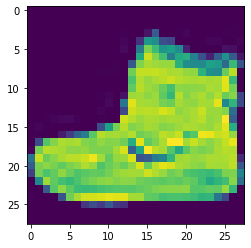

In [6]:
plt.imshow(train_images[0])

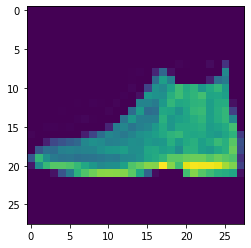

In [7]:
plt.imshow(test_images[0])

In [8]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

### Array 속 가장 큰수와 가장 작은 수 확인하기

In [9]:
print(f'Train Data \n가장 큰수 : {train_images.max()} \n가장 작은수: {train_images.min()}')

Train Data 
가장 큰수 : 255 
가장 작은수: 0


In [10]:
print(f'Test Data \n가장 큰수 : {test_images.max()} \n가장 작은수: {test_images.min()}')

Test Data 
가장 큰수 : 255 
가장 작은수: 0


### 데이터 전처리하기

In [11]:
train_images = train_images.reshape(-1, 28, 28, 1) / 255

In [12]:
train_images, val_images, train_labels, val_labels = train_test_split(train_images, 
                                                                      train_labels, 
                                                                      test_size=0.2, 
                                                                      random_state=42)

* 이 데이터는 현재 0 ~ 255 사이의 값을 가지고 있는데 이를 0 ~ 1 사이로 바꾸어 훈련 세트와 검증 세트로 나누어 준다.
* 완전 연결 신경망에서는 입력 이미지를 밀집층에 연겨하기 위해 일려로 펼치는 작업을 수행하는데 그것을 reshape() 혹은 flatten()을 이용한다. 하지만 합성곱 신경망은 2차원 이미지를 그대로 이용하기 때문에 일려로 펼치지 않는다.
* BUT!! 입력 이미지는 항상 채널차원이 있어야 한다. 지금 하고 있는 패션 mnist는 흑백이미지기 때문에 채널 차원을 추가해야 하므로, reshape()를 이용하여 전체 배열 차원을 그대로 유지하면서 마지막에 차원을 간단히 추가하는 작업을 수행해준다.

In [13]:
train_images.shape, val_images.shape

((48000, 28, 28, 1), (12000, 28, 28, 1))

* 위의 결과에서 확인할 수 있다시피 하나의 채널이 생긴 것을 확인 할 수 있다.

### CNN 모델 구축하기

In [14]:
model = Sequential()

# 입력층
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))

# Fully-connected layer
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.4))

# 출력층
model.add(Dense(10, activation='softmax'))

2022-07-13 17:22:36.506269: I tensorflow/core/platform/cpu_feature_guard.cc:152] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE3 SSE4.1 SSE4.2 AVX
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-07-13 17:22:37.274701: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 6691 MB memory:  -> device: 0, name: CUDA GPU, pci bus id: 0000:40:00.0, compute capability: 7.5


### 모델 요약

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 6, 6, 64)          0

### 모델의 흐름을 살펴보자

In [16]:
keras.utils.plot_model(model, show_shapes = True)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


* 백앤드 ai에서는 plot_model이 안되는거 같다.

### 모델 컴파일 하기

In [17]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
early_stop = EarlyStopping(monitor='val_loss', patience=3)

### 모델 훈련하기

In [19]:
history = model.fit(train_images, train_labels, epochs=100, 
                    validation_data=(val_images, val_labels),
                    callbacks=[early_stop]
                   )

Epoch 1/100


2022-07-13 17:22:40.034236: I tensorflow/stream_executor/cuda/cuda_dnn.cc:379] Loaded cuDNN version 8303


1500/1500 [==============================] - 42s 19ms/step - loss: 0.6232 - accuracy: 0.7717 - val_loss: 0.3649 - val_accuracy: 0.8654
Epoch 2/100
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3966 - accuracy: 0.8573 - val_loss: 0.3366 - val_accuracy: 0.8748
Epoch 3/100
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3435 - accuracy: 0.8760 - val_loss: 0.2734 - val_accuracy: 0.8983
Epoch 4/100
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3178 - accuracy: 0.8832 - val_loss: 0.2762 - val_accuracy: 0.8964
Epoch 5/100
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2981 - accuracy: 0.8914 - val_loss: 0.2578 - val_accuracy: 0.9033
Epoch 6/100
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2833 - accuracy: 0.8962 - val_loss: 0.2673 - val_accuracy: 0.8976
Epoch 7/100
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2717 - accuracy: 0.9013 - val_loss: 0.2580 - val_accuracy: 0.

### 모델의 결과 확인하기

In [20]:
df_hist = pd.DataFrame(history.history)
df_hist.tail()

,loss,accuracy,val_loss,val_accuracy
11,0.234087,0.911625,0.232647,0.914417
12,0.228156,0.915125,0.214072,0.921833
13,0.224431,0.916625,0.250276,0.906917
14,0.222601,0.916458,0.218978,0.919417
15,0.217958,0.918458,0.224604,0.918750


<AxesSubplot:>

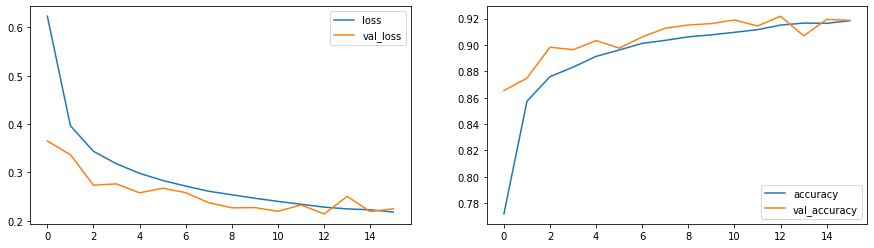

In [21]:
fig, axes = plt.subplots(1,2,figsize = (15,4))
df_hist[['loss','val_loss']].plot(ax=axes[0])
df_hist[['accuracy','val_accuracy']].plot(ax=axes[1])

In [22]:
model.evaluate(val_images,val_labels)

375/375 [==============================] - 1s 3ms/step - loss: 0.2246 - accuracy: 0.9187


[0.22460393607616425, 0.918749988079071]

In [23]:
model.evaluate(train_images,train_labels)

1500/1500 [==============================] - 4s 3ms/step - loss: 0.1425 - accuracy: 0.9448


[0.14254426956176758, 0.9447708129882812]

### 모델을 이용하여 예측해보기

**첫번째 이미지에 대하여 어떻게 예측하였는지 알아보자!**

In [24]:
val_images.shape

(12000, 28, 28, 1)

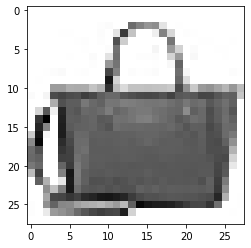

In [25]:
_=plt.imshow(val_images[0].reshape(28,28), cmap = 'gray_r')

In [26]:
pred = model.predict(val_images[0:1])
pred

array([[1.4841675e-18, 3.6091661e-32, 1.8813905e-23, 5.6870127e-24,
        1.2721345e-22, 4.0937750e-19, 8.2770652e-20, 6.0973918e-23,
        1.0000000e+00, 2.5502386e-24]], dtype=float32)

<BarContainer object of 10 artists>

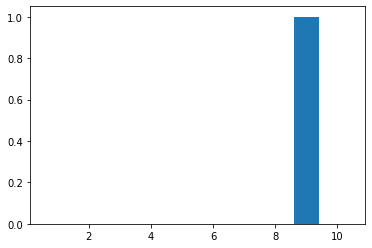

In [27]:
plt.bar(range(1,11), pred[0])

In [28]:
# 각 클래스에 대한 이름을 설정해주기
classes = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankel boot']

In [29]:
# np.argmax는 최대값의 위치를 반환해주는 값이다.
classes[np.argmax(pred)]

'Bag'

**test 데이터셋에 대한 예측을 해보자!**

In [30]:
# test 데이터 셋에 대하여 train 에서 해주었던거와 마찬가지로 scaling을 진행하도록 한다

test_images= test_images.reshape(-1, 28, 28, 1) / 255


In [31]:
y_pred = model.predict(test_images)

In [32]:
y_predict = np.argmax(y_pred, axis=1)
y_predict

array([9, 2, 1, ..., 8, 1, 5])

In [33]:
accuracy = (y_predict == test_labels).mean()
accuracy

0.9149